In [1]:
%cd ~/SSMuLA

/disk2/fli/SSMuLA


In [2]:
%load_ext autoreload
%autoreload 2
%load_ext blackcellmagic

In [3]:
import pandas as pd
import numpy as np

In [4]:
df = pd.read_csv("add_data/tev3_flighted_fitnesses.csv")

In [5]:
df

,Sequences,Number of Reads,Fitness Mean,Fitness Variance
0,HTY,10,-0.998598,0.023559
1,WNG,2,-0.313128,0.062665
2,QAM,14,-0.154889,0.010164
3,WMA,8,-0.130526,0.015088
4,PPV,44,-0.652319,0.004308
...,...,...,...,...
6720,SVR,15,-0.595815,0.010214
6721,QMI,59,-0.697410,0.003494
6722,LFS,33,-0.178564,0.004329
6723,NSM,5,-1.175829,0.055315


In [6]:
6725 / 20**3

0.840625

In [7]:
import matplotlib.pyplot as plt

In [24]:
df[df["Sequences"] == "NRQ"]

,Sequences,Number of Reads,Fitness Mean,Fitness Variance
4637,NRQ,122,0.245154,0.000498


In [26]:
df["Fitness Mean"].max(), df["Fitness Mean"].min()

(0.8512114, -1.1766073)

In [49]:
df[df["Fitness Mean"] <= df["Fitness Mean"].min()]

,Sequences,Number of Reads,Fitness Mean,Fitness Variance
2795,HGW,1,-1.176607,0.284717
5828,TKD,1,-1.176607,0.284717


In [81]:
# Step 1: Compute the first derivative
first_derivative = np.diff(sorted(df["Fitness Mean"])[:int(len(df) * 0.25)])

# Step 2: Compute the second derivative
second_derivative = np.diff(first_derivative)
# Set a threshold for what you consider a "significant change"
threshold = np.std(second_derivative) * 2  # Example threshold: two standard deviations above mean
significant_changes = np.where(np.abs(second_derivative) > threshold)[0] + 1  # +1 to correct index after diff
significant_changes

array([1055, 1056, 1058, 1059, 1076, 1077, 1083, 1085, 1086, 1093, 1094,
       1146, 1147, 1149, 1165, 1166, 1170, 1171, 1175, 1198, 1199, 1201,
       1207, 1208, 1210, 1211, 1229, 1231, 1235, 1236, 1237, 1238, 1241,
       1262, 1263, 1271, 1272, 1284, 1285, 1290, 1291, 1307, 1315, 1317,
       1318, 1319, 1321, 1339, 1342, 1344, 1345, 1368, 1369, 1374, 1375,
       1392, 1422, 1423, 1424, 1425, 1426, 1431, 1432, 1434, 1450, 1451,
       1453, 1454, 1464, 1465, 1482, 1483, 1484, 1485, 1490, 1492, 1496,
       1497, 1511, 1512, 1513, 1529, 1530, 1534, 1535, 1550, 1553, 1554,
       1558, 1586, 1587, 1602, 1603, 1607, 1608, 1616, 1617, 1618, 1625,
       1626, 1655, 1656, 1667, 1673, 1674, 1675, 1676, 1678])

In [79]:
threshold

0.00043850146550216426

In [69]:
cutoff_index = significant_changes[0]
cutoff_index

1055

In [70]:
cutoff = np.sort(df["Fitness Mean"])[cutoff_index]
cutoff

-1.1758288

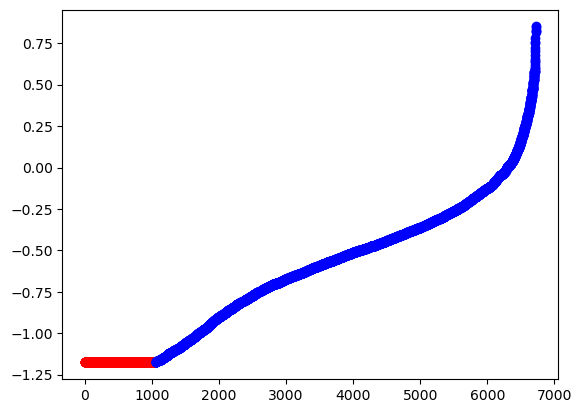

In [67]:
# Prepare colors based on the cutoff
colors = ['red' if value < cutoff else 'blue' for value in sorted(df["Fitness Mean"])]

# Plot each point with the corresponding color
for i, value in enumerate(sorted(df["Fitness Mean"])):
    plt.plot(i, value, 'o', color=colors[i])

plt.show()

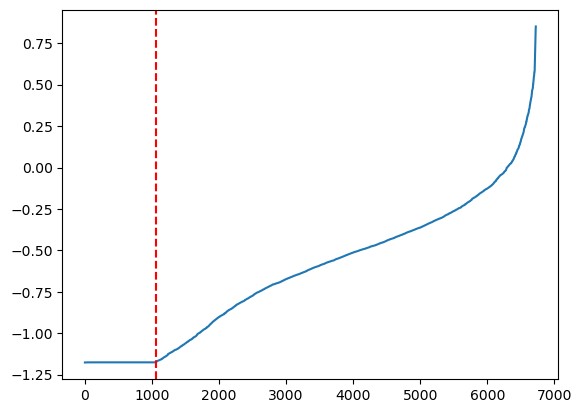

In [71]:
plt.plot(np.sort(df["Fitness Mean"]))
plt.axvline(x=cutoff_index, color='r', linestyle='--')
plt.show()

In [76]:
np.sort(df["Fitness Mean"])[cutoff_index-1: cutoff_index+2]

array([-1.1758288, -1.1758288, -1.1742709])

In [78]:
np.sort(df["Fitness Mean"])[cutoff_index], np.sort(df["Fitness Mean"])[cutoff_index+1]

(-1.1758288, -1.1742709)

In [72]:
df[df["Fitness Mean"] == cutoff]

,Sequences,Number of Reads,Fitness Mean,Fitness Variance
4269,MMY,15,-1.175829,0.018438
6187,DVF,15,-1.175829,0.018438


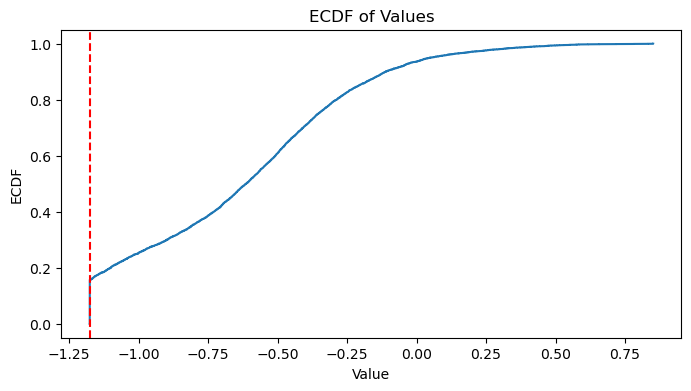

In [47]:
# Sorting the data
# x = np.sort(df['Number of Reads'])
x = np.sort(df["Fitness Mean"])
# Calculating the ECDF
y = np.arange(1, len(x)+1) / len(x)

# Plotting
plt.figure(figsize=(8, 4))
plt.step(x, y, where='post')
plt.title('ECDF of Values')
plt.xlabel('Value')
plt.ylabel('ECDF')

plt.axvline(x=df["Fitness Mean"].min(), color='r', linestyle='--')
# plt.grid(True)
plt.show()


In [9]:
df_4site = pd.read_csv("add_data/tev4_fitnesses_read_count.csv")
df_4site

,Sequences,Number of Reads,Fitness Mean,Fitness Variance,Complete Sequence,Mutation Distance,Original Read Count
0,IEMG,68,-0.076679,0.001506,MFKGPRDYNPISSTICHLTNESDGHTTSLYGIGFGPFIITNKHLFR...,4,8.0
1,HMIR,83,0.004400,0.001050,MFKGPRDYNPISSTICHLTNESDGHTTSLYGIGFGPFIITNKHLFR...,4,1.0
2,HNED,100,-0.013391,0.000910,MFKGPRDYNPISSTICHLTNESDGHTTSLYGIGFGPFIITNKHLFR...,4,1.0
3,HWFP,71,-0.080454,0.001371,MFKGPRDYNPISSTICHLTNESDGHTTSLYGIGFGPFIITNKHLFR...,4,1.0
4,HTFN,56,-0.009842,0.001542,MFKGPRDYNPISSTICHLTNESDGHTTSLYGIGFGPFIITNKHLFR...,4,1.0
...,...,...,...,...,...,...,...
159127,CKLF,55,-0.049176,0.001814,MFKGPRDYNPISSTICHLTNESDGHTTSLYGIGFGPFIITNKHLFR...,4,1.0
159128,DHRT,374,0.063391,0.000242,MFKGPRDYNPISSTICHLTNESDGHTTSLYGIGFGPFIITNKHLFR...,4,11.0
159129,CGGF,9,0.018670,0.009830,MFKGPRDYNPISSTICHLTNESDGHTTSLYGIGFGPFIITNKHLFR...,4,NaN
159130,CVSV,1059,-0.010167,0.000087,MFKGPRDYNPISSTICHLTNESDGHTTSLYGIGFGPFIITNKHLFR...,4,27.0


In [10]:
df_4site[df_4site["Mutation Distance"] == 0]

,Sequences,Number of Reads,Fitness Mean,Fitness Variance,Complete Sequence,Mutation Distance,Original Read Count
104138,TDHS,721,0.414362,0.0001,MFKGPRDYNPISSTICHLTNESDGHTTSLYGIGFGPFIITNKHLFR...,0,21.0


In [17]:
df_4site[df_4site["Mutation Distance"] == 0]["Complete Sequence"].values[0]

'MFKGPRDYNPISSTICHLTNESDGHTTSLYGIGFGPFIITNKHLFRRNNGTLLVQSLHGVFKVKNTTTLQQHLIDGRDMIIIRMPKDFPPFPQKLKFREPQREERICLVTTNFQTKSMSSMVSDTSCTFPSSDGIFWKHWIQTKDGQCGSPLVSTRDGFIVGIHSASNFTNTNNYFTSVPKNFMELLTNQEAQQWVSGWRLNADSVLWGGHKVFMVKPEEPFQPVKEATQLMN'

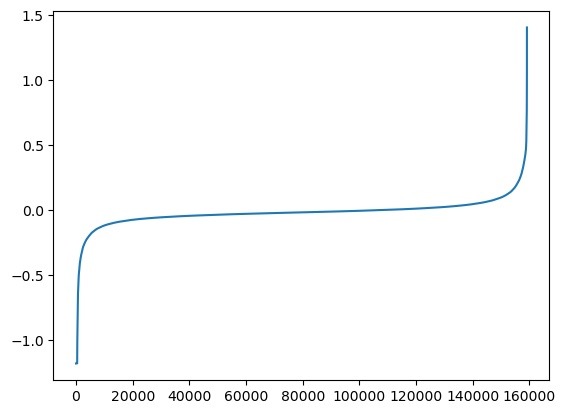

In [28]:
plt.plot(sorted(df_4site['Fitness Mean']))

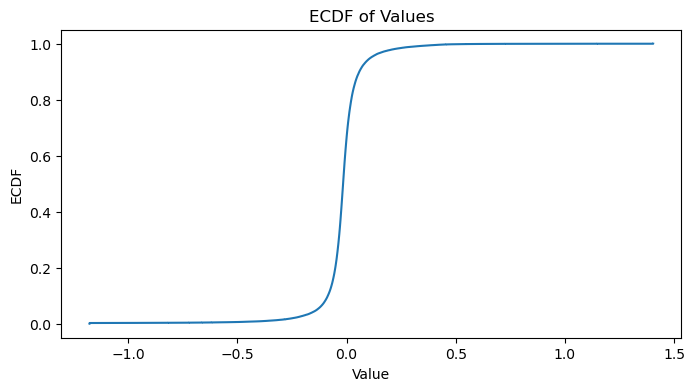

In [27]:
# Sorting the data
# x = np.sort(df_4site['Number of Reads'])
x = np.sort(df_4site["Fitness Mean"])
# Calculating the ECDF
y = np.arange(1, len(x)+1) / len(x)

# Plotting
plt.figure(figsize=(8, 4))
plt.step(x, y, where='post')
plt.title('ECDF of Values')
plt.xlabel('Value')
plt.ylabel('ECDF')
# plt.grid(True)
plt.show()


In [11]:
from Bio.Seq import Seq

In [15]:
t7_aa = "MNTINIAKNDFSDIELAAIPFNTLADHYGERLAREQLALEHESYEMGEARFRKMFERQLKAGEVADNAAAKPLITTLLPKMIARINDWFEEVKAKRGKRPTAFQFLQEIKPEAVAYITIKTTLACLTSADNTTVQAVASAIGRAIEDEARFGRIRDLEAKHFKKNVEEQLNKRVGHVYKKAFMQVVEADMLSKGLLGGEAWSSWHKEDSIHVGVRCIEMLIESTGMVSLHRQNAGVVGQDSETIELAPEYAEAIATRAGALAGISPMFQPCVVPPKPWTGITGGGYWANGRRPLALVRTHSKKALMRYEDVYMPEVYKAINIAQNTAWKINKKVLAVANVITKWKHCPVEDIPAIEREELPMKPEDIDMNPEALTAWKRAAAAVYRKDKARKSRRISLEFMLEQANKFANHKAIWFPYNMDWRGRVYAVSMFNPQGNDMTKGLLTLAKGKPIGKEGYYWLKIHGANCAGVDKVPFPERIKFIEENHENIMACAKSPLENTWWAEQDSPFCFLAFCFEYAGVQHHGLSYNCSLPLAFDGSCSGIQHFSAMLRDEVGGRAVNLLPSETVQDIYGIVAKKVNEILQADAINGTDNEVVTVTDENTGEISEKVKLGTKALAGQWLAYGVTRSVTKRSVMTLAYGSKEFGFRQQVLEDTIQPAIDSGKGLMFTQPNQAAGYMAKLIWESVSVTVVAAVEAMNWLKSAAKLLAAEVKDKKTGEILRKRCAVHWVTPDGFPVWQEYKKPIQTRLNLMFLGQFRLQPTINTNKDSEIDAHKQESGIAPNFVHSQDGSHLRKTVVWAHEKYGIESFALIHDSFGTIPADAANLFKAVRETMVDTYESCDVLADFYDQFADQLHESQLDKMPALPAKGNLNLRDILESDFAFA"

In [17]:
t7_aa[748-1], t7_aa[756-1], t7_aa[758-1]

('N', 'R', 'Q')